In [63]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import geopy
import numpy as np
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 50)

In [64]:
cu_path = os.getcwd()

In [65]:
file = cu_path  +"/vehicles.csv"
df = pd.read_csv(file , encoding = "utf-8")
df = df[df["state"] == "ca"]
df = df[(df["price"] > 1000) & (df["price"] < 40000)]

In [66]:
display(df)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
21171,7316895739,https://bakersfield.craigslist.org/ctd/d/baker...,bakersfield,https://bakersfield.craigslist.org,16990,2018.0,hyundai,accent se sedan 4d,good,NaN,gas,16930.0,clean,other,3KPC24A37JE034842,fwd,NaN,sedan,white,https://images.craigslist.org/00k0k_2G5SBDPenD...,Carvana is the safer way to buy a car During t...,NaN,ca,35.380000,-119.020000,2021-05-04T12:41:15-0700
21172,7316894967,https://bakersfield.craigslist.org/cto/d/tehac...,bakersfield,https://bakersfield.craigslist.org,3700,2004.0,toyota,highlander,good,6 cylinders,gas,142000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/01313_dTUjBqHGgj...,"Runs Good,Brand New Tires,Tags are Current til...",NaN,ca,35.132200,-118.449000,2021-05-04T12:40:04-0700
21174,7316887125,https://bakersfield.craigslist.org/ctd/d/bloom...,bakersfield,https://bakersfield.craigslist.org,11975,2003.0,harley-davidson,davidson,excellent,8 cylinders,gas,207000.0,clean,automatic,NaN,rwd,full-size,pickup,black,https://images.craigslist.org/00F0F_eEBhgvA15M...,MANAGER'S SPECIAL!!! *****💰💰💰🤑 >HUGE TAX SALE...,NaN,ca,34.070612,-117.383384,2021-05-04T12:26:43-0700
21176,7316874004,https://bakersfield.craigslist.org/ctd/d/stant...,bakersfield,https://bakersfield.craigslist.org,21950,2003.0,chevrolet,silverado 3500,excellent,8 cylinders,diesel,202537.0,clean,automatic,1GCJK33113F211259,4wd,full-size,truck,grey,https://images.craigslist.org/00m0m_9owDGrPLWK...,Call 949-652-3373 SE HABLA ESPAÑOL SEE WHAT ...,NaN,ca,33.794656,-117.992994,2021-05-04T12:04:51-0700
21178,7316859625,https://bakersfield.craigslist.org/ctd/d/baker...,bakersfield,https://bakersfield.craigslist.org,27590,2018.0,acura,tlx 3.5 sedan 4d,good,6 cylinders,gas,20420.0,clean,other,19UUB2F36JA005838,fwd,NaN,sedan,black,https://images.craigslist.org/00r0r_cyO57DXDL0...,Carvana is the safer way to buy a car During t...,NaN,ca,35.380000,-119.020000,2021-05-04T11:41:04-0700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71780,7301699513,https://yubasutter.craigslist.org/ctd/d/yuba-c...,yuba-sutter,https://yubasutter.craigslist.org,34590,2020.0,cadillac,xt4 sport suv 4d,good,NaN,gas,9624.0,clean,other,1GYFZFR48LF105065,NaN,NaN,hatchback,white,https://images.craigslist.org/00o0o_abvx3L9cwh...,Carvana is the safer way to buy a car During t...,NaN,ca,39.050000,-121.610000,2021-04-04T09:53:04-0700
71781,7301669393,https://yubasutter.craigslist.org/ctd/d/yuba-c...,yuba-sutter,https://yubasutter.craigslist.org,36590,2018.0,acura,mdx advance and,good,NaN,other,19139.0,clean,automatic,5J8YD3H99JL001628,fwd,NaN,SUV,NaN,https://images.craigslist.org/00c0c_dHHPTmtAA4...,Carvana is the safer way to buy a car During t...,NaN,ca,39.050000,-121.610000,2021-04-04T08:41:03-0700
71782,7301647204,https://yubasutter.craigslist.org/ctd/d/yuba-c...,yuba-sutter,https://yubasutter.craigslist.org,31990,2017.0,jaguar,f-pace 35t r-sport suv 4d,good,6 cylinders,gas,60077.0,clean,automatic,SADCL2BV9HA063620,NaN,NaN,SUV,silver,https://images.craigslist.org/00101_ErSdMtNJAT...,Carvana is the safer way to buy a car During t...,NaN,ca,39.050000,-121.610000,2021-04-04T07:41:31-0700
71783,7301647191,https://yubasutter.craigslist.org/ctd/d/yuba-c...,yuba-sutter,https://yubasutter.craigslist.org,14590,2015.0,mazda,cx-5 touring sport utility,good,NaN,gas,103839.0,clean,automatic,JM3KE2CYXF0514056,fwd,NaN,SUV,black,https://images.craigslist.org/01717_hmE9zjsASN...,Carvana is the safer way to buy a car During t...,NaN,ca,39.050000,-121.610000,2021-04-04T07:41:30-0700


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40314 entries, 21171 to 71784
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            40314 non-null  int64  
 1   url           40314 non-null  object 
 2   region        40314 non-null  object 
 3   region_url    40314 non-null  object 
 4   price         40314 non-null  int64  
 5   year          40276 non-null  float64
 6   manufacturer  38817 non-null  object 
 7   model         39892 non-null  object 
 8   condition     29431 non-null  object 
 9   cylinders     25103 non-null  object 
 10  fuel          40264 non-null  object 
 11  odometer      39667 non-null  float64
 12  title_status  39084 non-null  object 
 13  transmission  40188 non-null  object 
 14  VIN           25515 non-null  object 
 15  drive         27153 non-null  object 
 16  size          10953 non-null  object 
 17  type          32958 non-null  object 
 18  paint_color   28086 no

In [68]:
df.isnull().sum()

id                  0
url                 0
region              0
region_url          0
price               0
year               38
manufacturer     1497
model             422
condition       10883
cylinders       15211
fuel               50
odometer          647
title_status     1230
transmission      126
VIN             14799
drive           13161
size            29361
type             7356
paint_color     12228
image_url           4
description         4
county          40314
state               0
lat                68
long               68
posting_date        4
dtype: int64

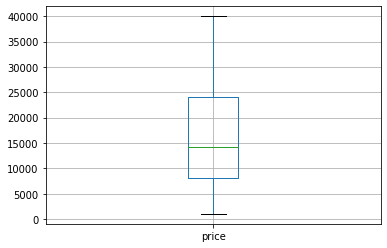

In [69]:
b_plot = df.boxplot(column = 'price')
b_plot.plot()
plt.show()

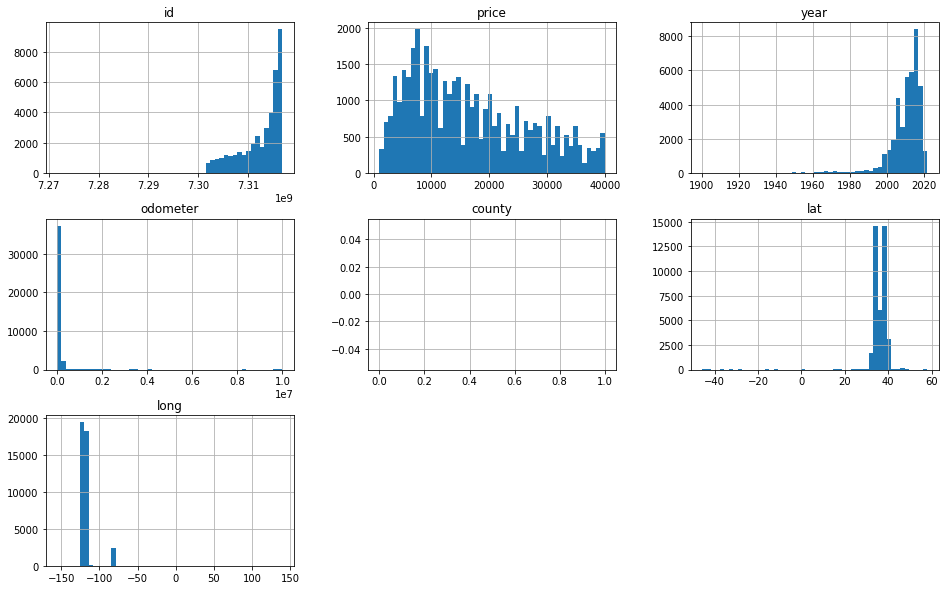

In [70]:
df.hist(bins=50)
fig = plt.gcf()
fig.set_size_inches(16, 10)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

## **Data processing**

Delete the unnecessary columns


The county are almost null. I remove the "county" and "region" since there is already "state" columns, and I will get the zip-code from the lat, lon

In [71]:
df = df.drop(["url" , "region_url" , "image_url", "county" , "region" , "VIN"] , axis = 1)

Get the zip code information through latitude and longitude

In [72]:
# Use the geolocater to get the zipcode
def get_zip_info():
  geolocator = geopy.Nominatim(user_agent="test")
  lat_list = []
  long_list = []
  zipcode_list = []
  df_drop = df.drop_duplicates(subset=["lat","long"])
  for lat , long in zip(df_drop["lat"] , df_drop["long"]):
    lat_list.append(lat)
    long_list.append(long)
    if (np.isnan(lat) == False) and (np.isnan(long) == False):
      try:
        location = geolocator.reverse((lat, long))
        result = location.raw['address']['postcode']
      except:
        result = ""
    else:
      result = ""
    zipcode_list.append(result)

  zipdf = pd.DataFrame(list(zip(zipcode_list,lat_list,long_list)) , columns = ["zipcode" , "lat" , "long"])
  zipdf.to_csv(cu_path + "/zipdf.csv" , encoding = "utf-8" , index = False)


if os.path.exists(cu_path + "/zipdf.csv") == False:
  get_zip_info()
else:
  pass
# combine the df
zipdf = pd.read_csv(cu_path + "/zipdf.csv" , encoding = "utf-8")
df = pd.merge(df , zipdf , on = ["lat" , "long"] , how = "left")
# drop the unnecessary columns
df = df.drop(["lat" , "long"] , axis = 1)

In [73]:
# posting_date
df = df[df["posting_date"].notna()]
# year,manufacturer
df["posting_date"] = pd.to_datetime(df["posting_date"] , utc=True)
for index , year , posting_date , manufacturer , model in zip(df.index , df["year"] , df["posting_date"] , df["manufacturer"] , df["model"]):
  # year
  if (np.isnan(year) == True):
    fill_value = df[df["posting_date"] < posting_date]["year"].median()
    df.at[index , "year"] = fill_value
  # manufacturer
  if pd.isnull(manufacturer) == True:
    manu_fill_list = df[df["model"] == model]["manufacturer"].tolist()
    manu_fill_list = [x for x in manu_fill_list if not(pd.isnull(x)) == True]
    try:
      manu_fill_value = manu_fill_list[0]
      df.at[index , "manufacturer"] = manu_fill_value
    except:
      pass
# odometer
df["odometer"] = df["odometer"].fillna(df["odometer"].median())
# description
is_des_list = []
for des in df["description"]:
  if (pd.isnull(des) == False):
    if len(des) > 0:
      is_des_list.append(len(des))
    else:
      is_des_list.append(0)
  else:
    is_des_list.append(0)
df["num_description"] = is_des_list
df = df.drop("description" , axis = 1)
# model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,manufacturer,zipcode
label_encoder = preprocessing.LabelEncoder()
cat_columns = ["model" , "condition" , "cylinders" , "fuel" , "title_status" , "transmission" , "drive" , "size" , "type" , "paint_color" , "manufacturer" , "zipcode"]
for cat in cat_columns:
  df[cat] = df[cat].fillna("no_info")
# perform the label encoding
cat_columns += ["state"]
for cat in cat_columns:
  df[cat] = label_encoder.fit_transform(df[cat])
# Delete the "model" column
df = df.drop("model" , axis = 1)
# posting date
df["posting_date_year"] = df["posting_date"].dt.year
df["posting_date_month"] = df["posting_date"].dt.month
df = df.drop('posting_date' , axis = 1)
# change the data type
df["year"] = df["year"].astype(int)
df["odometer"] = df["odometer"].astype(int)
cat_columns = ["condition" , "cylinders" , "fuel" , "title_status" , "transmission" , "drive" , "size" , "type" , "paint_color" , "manufacturer" , "zipcode"]
cat_columns += ["state"]
for cat in cat_columns:
  df[cat] = df[cat].astype('category')
df = df.drop("id" , axis = 1)

In [74]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40310 entries, 0 to 40313
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   price               40310 non-null  int64   
 1   year                40310 non-null  int32   
 2   manufacturer        40310 non-null  category
 3   condition           40310 non-null  category
 4   cylinders           40310 non-null  category
 5   fuel                40310 non-null  category
 6   odometer            40310 non-null  int32   
 7   title_status        40310 non-null  category
 8   transmission        40310 non-null  category
 9   drive               40310 non-null  category
 10  size                40310 non-null  category
 11  type                40310 non-null  category
 12  paint_color         40310 non-null  category
 13  state               40310 non-null  category
 14  zipcode             40310 non-null  category
 15  num_description     40310 non-null  

price                 0
year                  0
manufacturer          0
condition             0
cylinders             0
fuel                  0
odometer              0
title_status          0
transmission          0
drive                 0
size                  0
type                  0
paint_color           0
state                 0
zipcode               0
num_description       0
posting_date_year     0
posting_date_month    0
dtype: int64

## **Building Random Forest Model**

### **Grid Search for the parameters**

In [75]:
# GRID SEARCH PURPOSE
# split train and test data
x_cols_list = df.columns.tolist()
x_cols_list.remove("price")
X_train, X_test,  Y_train, Y_test = train_test_split(df[x_cols_list],df["price"],test_size=0.3, random_state=3)
# grid search for params
RFC_grid = {"n_estimators": [i for i in range(1,10,2)],
            "max_depth":[i for i in range(1,10,2)],
            'max_features': ['sqrt', 'log2','auto', None],
            'criterion' : ["absolute_error"]}
rf = RandomForestRegressor()
model_tuning = GridSearchCV(
    estimator = rf,
    param_grid = RFC_grid,
    cv = 3,
    n_jobs = -1,
    scoring = "neg_mean_absolute_error"
)
model_tuning.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['absolute_error'],
                         'max_depth': [1, 3, 5, 7, 9],
                         'max_features': ['sqrt', 'log2', 'auto', None],
                         'n_estimators': [1, 3, 5, 7, 9]},
             scoring='neg_mean_absolute_error')

### **Build Random Forest Model based on parameters from Grid Search**

In [81]:
# split train and test data
x_cols_list = df.columns.tolist()
x_cols_list.remove("price")
X_train, X_test,  Y_train, Y_test = train_test_split(df[x_cols_list],df["price"],test_size=0.3, random_state=3)

rf = RandomForestRegressor(
  n_estimators=5,
  max_features=model_tuning.best_params_["max_features"],
  max_depth=model_tuning.best_params_["max_depth"],
  criterion="absolute_error"
)
rf.fit(X_train, Y_train)
y_test_pred  = rf.predict(X_test)
y_train_pred = rf.predict(X_train)
# RMSE
print('RMSE training: %.2f, test: %.2f' % (
        mean_squared_error(Y_train, y_train_pred, squared=False),
        mean_squared_error(Y_test, y_test_pred, squared=False)
      ))
# R^2
print('R^2 training: %.2f, test: %.2f' % (
        r2_score(Y_train, y_train_pred),
        r2_score(Y_test, y_test_pred)
      ))
# MAPE
print('mape training: %.2f, test: %.2f' % (
        mean_absolute_percentage_error(Y_train, y_train_pred),
        mean_absolute_percentage_error(Y_test, y_test_pred)
      ))

RMSE training: 4868.27, test: 5268.12
R^2 training: 0.77, test: 0.73
mape training: 0.31, test: 0.33


## **Result of the Model**

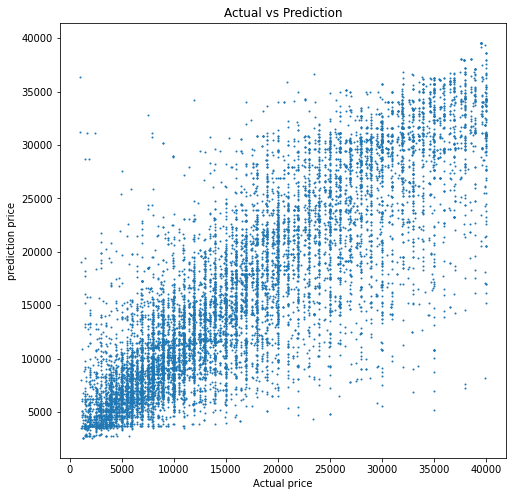

In [80]:
plt.figure(figsize=(8, 8))
plt.scatter(Y_test, y_test_pred , s=1)
plt.title("Actual vs Prediction")
plt.xlabel("Actual price")
plt.ylabel("prediction price")
plt.show()

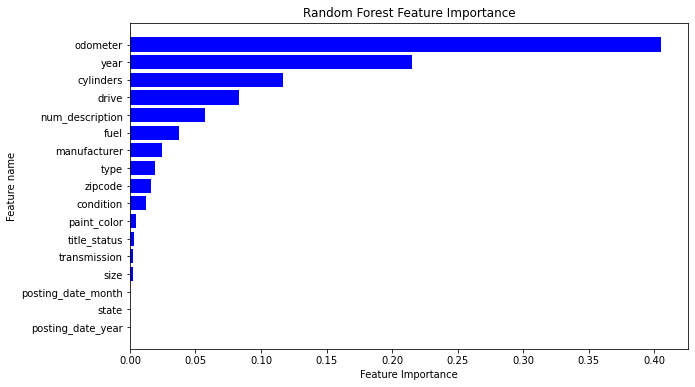

In [78]:
importances_df = pd.DataFrame({"feature_names" : rf.feature_names_in_,
                               "importances" : rf.feature_importances_})
importances_df = importances_df.sort_values(by=['importances'] , ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(importances_df["feature_names"] , importances_df["importances"],color='b', align='center')
plt.title("Random Forest Feature Importance")
plt.xlabel("Feature Importance")
plt.ylabel("Feature name")
plt.show()